In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/DiabetesDiagnosis.xls')
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [ ]:
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
Xnorm = MMS.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(random_state=2022, n_clusters=3, max_iter=300)
kmeans_model.fit(Xnorm)

KMeans(n_clusters=3, random_state=2022)

In [ ]:
kmeans_model.cluster_centers_

array([[0.45098039, 0.6554353 , 0.62638363, 0.17551584, 0.07393769,
        0.48464468, 0.17019751, 0.42863248],
       [0.13797446, 0.52421127, 0.50218078, 0.14017854, 0.03995055,
        0.42721849, 0.13630891, 0.08939857],
       [0.11139528, 0.6849222 , 0.60018215, 0.34977797, 0.20326972,
        0.5462177 , 0.21624443, 0.13115942]])

In [ ]:
MMS.inverse_transform(kmeans_model.cluster_centers_)

array([[  7.66666667, 130.43162393,  76.41880342,  17.37606838,
         62.55128205,  32.51965812,   0.47660256,  46.71794872],
       [  2.34556575, 104.31804281,  61.26605505,  13.87767584,
         33.79816514,  28.66636086,   0.39723547,  26.36391437],
       [  1.89371981, 136.29951691,  73.22222222,  34.62801932,
        171.96618357,  36.65120773,   0.58444444,  28.86956522]])

In [ ]:
L = kmeans_model.labels_
L

array([0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1,

In [ ]:
df[L==2]

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis
4,0,137,40,35,168,43.1,2.288,33,0
8,2,197,70,45,543,30.5,0.158,53,0
13,1,189,60,23,846,30.1,0.398,59,0
16,0,118,84,47,230,45.8,0.551,31,0
19,1,115,70,30,96,34.6,0.529,32,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,1
748,3,187,70,22,200,36.4,0.408,36,0
751,1,121,78,39,74,39.0,0.261,28,1
753,0,181,88,44,510,43.3,0.222,26,0


In [ ]:
df['Cluster'] = L
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis,Cluster
0,6,148,72,35,0,33.6,0.627,50,0,0
1,1,85,66,29,0,26.6,0.351,31,1,1
2,8,183,64,0,0,23.3,0.672,32,0,0
3,1,89,66,23,94,28.1,0.167,21,1,1
4,0,137,40,35,168,43.1,2.288,33,0,2


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(Xnorm, L)

0.1815110341488669

In [ ]:
X_new = np.array([[  1.   ,  95.   ,  74.   ,  21.   ,  73.   ,  25.9  ,   0.673, 36.   ],
               [  6.   , 103.   ,  66.   ,   0.   ,   0.   ,  24.3  ,   0.249, 29.   ],
               [  5.   , 166.   ,  76.   ,   0.   ,   0.   ,  45.7  ,   0.34 , 27.   ],
               [  4.   , 115.   ,  72.   ,   0.   ,   0.   ,  28.9  ,   0.376, 46.   ]])

X_new_norm = MMS.transform(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
kmeans_model.predict(X_new_norm)

array([1, 1, 1, 0], dtype=int32)

In [ ]:
df = pd.read_excel('/content/customer transaction.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

,ID,ProductLine,ProductNumber,Date,Amount
0,1,D-400,438,2005-08-04 04:30:00,129
1,1,C-300,305,2004-10-25 03:30:00,50
2,1,D-400,487,2004-07-24 04:30:00,118
3,1,D-400,496,2004-07-24 04:30:00,136
4,1,C-300,395,2006-09-04 03:30:00,52
5,2,E-500,589,2005-09-23 03:30:00,183
6,2,A-100,134,2004-11-05 03:30:00,24
7,2,C-300,395,2005-11-10 03:30:00,66
8,2,B-200,238,2004-12-03 03:30:00,77
9,3,C-300,303,2005-06-04 04:30:00,102


In [ ]:
ag = df.groupby('ID').agg({'Date':np.max, 'ID':len, 'Amount':np.sum})
ag.head()

,Date,ID,Amount
ID,,,
1,2006-09-04 03:30:00,5,485
2,2005-11-10 03:30:00,4,350
3,2005-06-04 04:30:00,2,233
4,2006-08-18 03:30:00,7,936
5,2006-07-07 03:30:00,3,359


In [ ]:
(pd.datetime.now() - ag['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


ID
1      5603 days 19:40:38.219570
2      5901 days 19:40:38.219570
3      6060 days 18:40:38.219570
4      5620 days 19:40:38.219570
5      5662 days 19:40:38.219570
                  ...           
996    5671 days 19:40:38.219570
997    6138 days 19:40:38.219570
998    5577 days 19:40:38.219570
999    6184 days 19:40:38.219570
1000   5640 days 19:40:38.219570
Name: Date, Length: 995, dtype: timedelta64[ns]

In [ ]:
ag['Date'] = (pd.datetime.now() - ag['Date']) / np.timedelta64(1,'D')
ag.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Date,ID,Amount
ID,,,
1,5603.819887,5,485
2,5901.819887,4,350
3,6060.778220,2,233
4,5620.819887,7,936
5,5662.819887,3,359


In [ ]:
ag = ag.rename(columns={'Date':'R', 'ID':'F', 'Amount':'M'})
ag.head()

,R,F,M
ID,,,
1,5603.819887,5,485
2,5901.819887,4,350
3,6060.778220,2,233
4,5620.819887,7,936
5,5662.819887,3,359


In [ ]:
MMS = MinMaxScaler()
Xnorm = MMS.fit_transform(ag)

In [ ]:
model = KMeans(random_state=2020, n_clusters=4)
model.fit(Xnorm)

KMeans(n_clusters=4, random_state=2020)

In [ ]:
MMS.inverse_transform(model.cluster_centers_)

array([[6.04481899e+03, 2.52150538e+00, 2.26123656e+02],
       [5.64531349e+03, 4.16624041e+00, 3.61135550e+02],
       [5.64449510e+03, 7.77350427e+00, 7.74807692e+02],
       [5.93055358e+03, 5.37500000e+00, 5.41250000e+02]])

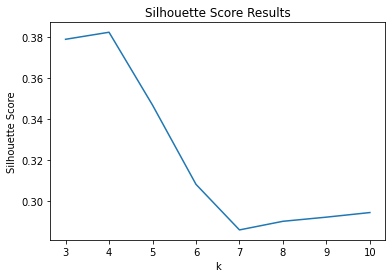

In [ ]:
sil = []
for K in range(3,11):
  model = KMeans(n_clusters=K)
  model.fit(Xnorm)
  L = model.labels_
  sil.append(silhouette_score(Xnorm, L))
plt.plot(range(3,11), sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Results')
plt.show()

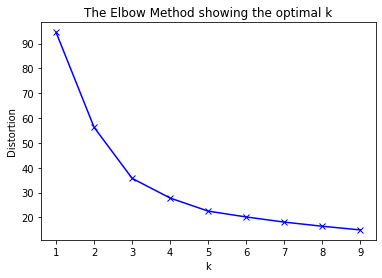

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(Xnorm)
    distortions.append(model.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#DBSCAN

In [ ]:
import math
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

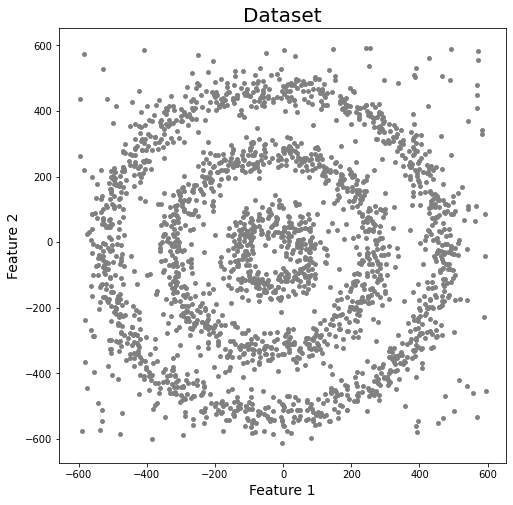

In [ ]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

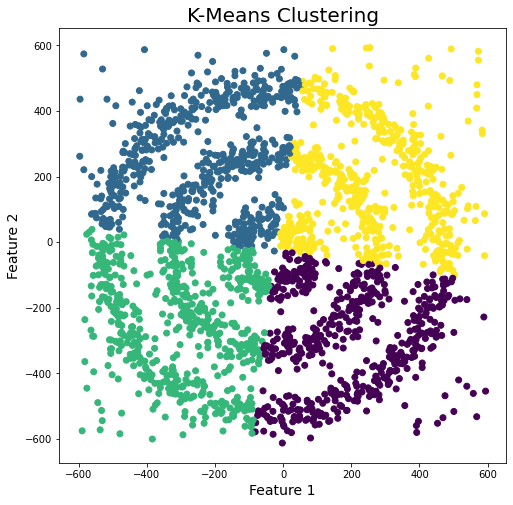

In [ ]:
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])
df['KMeans_labels']=k_means.labels_

colors=['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['KMeans_labels'])
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

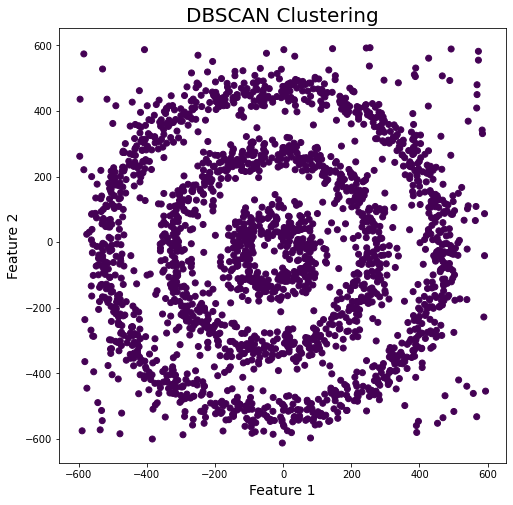

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])
df['DBSCAN_labels']=dbscan.labels_ 

plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

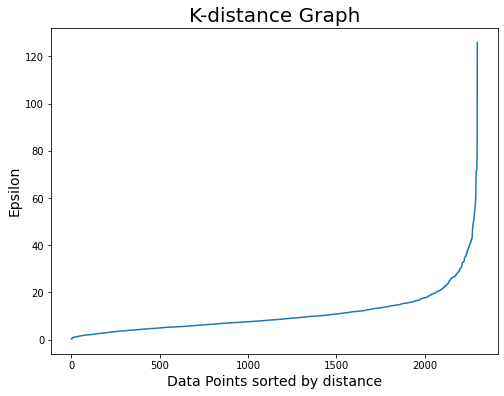

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

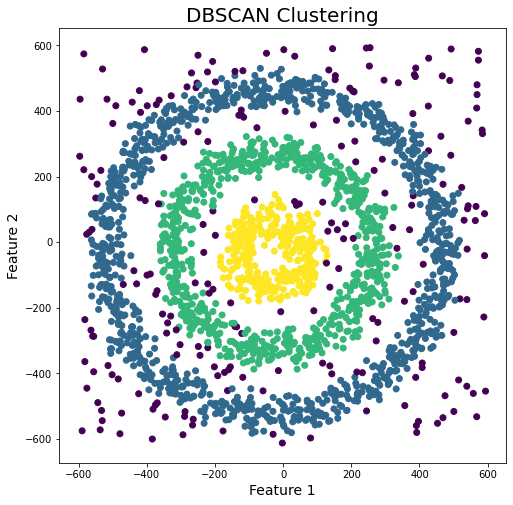

In [ ]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
L = dbscan_opt.labels_
L

array([ 0,  0,  0, ..., -1, -1, -1])

In [ ]:
df_outliers = df[L==-1]

In [ ]:
# frequent pattern & association rules

In [ ]:
!pip install mlxtend==0.17.0

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.75) ]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [ ]:
fpgrowth(df, min_support=0.5, use_colnames=True, max_len=4)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Kidney Beans, Eggs)"


In [ ]:
rules = association_rules(frequent_itemsets, min_threshold=0.9, metric='confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
1,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
2,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
3,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [ ]:
def find_eggs(tup):
    for t in tup:
        if t=='Eggs':
            return True
    return False

rules['has_eggs'] = rules['consequents'].apply(find_eggs)
rules[rules['has_eggs']==True]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,has_eggs
1,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,True
5,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,True
7,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf,True
